In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE 
import nbimporter
from Analysis import kmeans

Importing Jupyter notebook from /Users/mirandago/Desktop/284-team-project/Analysis/kmeans.ipynb


In [2]:
# Only using the top 15 PCs
pc = np.load('./PCA_top100.npy')
pc = pc[:,0:70]
print(np.shape(pc))

(2504, 70)


In [3]:
#Perform tSNE
tSNE = TSNE(n_components=2).fit_transform(pc)
print(np.shape(tSNE))

(2504, 2)


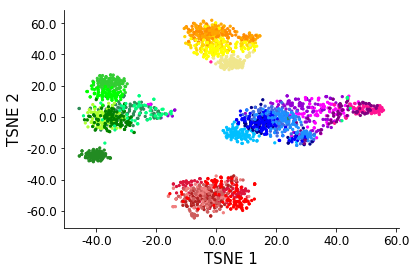

In [18]:
#Plot tSNE data

#Load population labels
sample_to_pop = {}
with open("df_pop.csv", "r") as f:
    for line in f:  
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

pop_to_color = {
    # EAS - yellow & orange
    "CHB": "yellow", "JPT": "khaki", "CHS": "gold", "CDX": "orange", "KHV": "darkorange", 
    # EUR - blue
    "CEU": "blue", "TSI": "dodgerblue", "FIN": "deepskyblue", "GBR": "darkblue", "IBS": "royalblue",
    # AFR - green
    "YRI": "green", "LWK": "forestgreen", "GWD": "limegreen", "MSL": "lime", "ESN": "greenyellow", 
    "ASW": "springgreen", "ACB": "seagreen", 
    # AMR - purple
    "MXL": "purple", "PUR": "darkviolet", "CLM": "magenta", "PEL": "deeppink", 
    # SAS - red
    "GIH": "red", "PJL": "crimson", "BEB": "firebrick", "STU": "lightcoral", "ITU": "indianred", 
    # None
    "None": "lightgrey"  
}

colors = []
sample_names = []
for sample in sample_to_pop.values():
    if len(sample) == 3:
        color = pop_to_color[sample]
        colors.append(color)    
    
tsne1 = tSNE[0:, 0:1].transpose()[0]
tsne2 = tSNE[0:, 1:2].transpose()[0]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tsne1, tsne2, color=colors, s=5)
ax.set_xlabel("TSNE 1", size=15)
ax.set_ylabel("TSNE 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

## KMeans Clustering into 5 Clusters

Group 1. Legend Index:
2
Accuracy:
0.998019801980198
Group 2. Legend Index:
3
Accuracy:
0.9818840579710145
Group 3. Legend Index:
4
Accuracy:
1.0
Group 4. Legend Index:
1
Accuracy:
0.9849624060150376
Group 5. Legend Index:
0
Accuracy:
0.8840070298769771
Total Accuracy:
0.9697746591686455


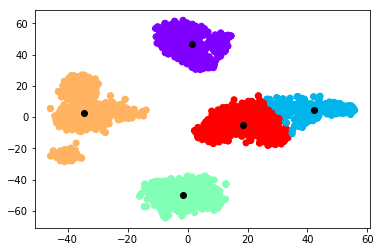

In [5]:
kmeans.kmeans(tSNE)